### El conjunto de datos contiene informacion completa sobre los productos de Amazon, incluyendo precios, descuentos, valoraciones, reseñas y otros metadatos relevantes. 

### EL objetivo del análisis:

    * Realizar análisis exploratorio de datos (EDA) sobre precios, descuentos y reseñas de productos
    * Visualizar las relaciones y patrones entre los diferentes atributos.
    * Identificar los principales factores que impulsan el éxito de un producto.
    * Desarrollar modelos predictivos para la previsión de ventas o clasificacion de productos
    * Generar información para optimizar las estrategias de marketing y precios

In [155]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots in the notebook
%matplotlib inline

# Scikit-learn Modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

# XGBoost
from xgboost import XGBRegressor

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## Traduccion de las columnas

In [156]:
df = pd.read_csv('amazon.csv')
# Diccionario con las traducciones de los titulos de las columnas
traduccion_col = {
    'product_id': 'id_producto',
    'product_name': 'nombre_producto',
    'category': 'categoria',
    'discounted_price': 'descuento_precio',
    'actual_price': 'precio_actual',
    'discount_percentage': 'porcentaje_descuento',
    'rating': 'clasificacion',
    'rating_count': 'recuento_clasificaciones',
    'about_product': 'detalle_producto',
    'user_id': 'id_usuario',
    'user_name': 'nombre_usuario',
    'review_id': 'id_de_revision',
    'review_title': 'titulo_resenia',
    'review_content': 'contenido_revision',
    'img_link': 'link_imagen',
    'product_link': 'link_producto'
}
# Reemplazar los titulos
df.rename(columns=traduccion_col, inplace=True)

df.head()

,id_producto,nombre_producto,categoria,descuento_precio,precio_actual,porcentaje_descuento,clasificacion,recuento_clasificaciones,detalle_producto,id_usuario,nombre_usuario,id_de_revision,titulo_resenia,contenido_revision,link_imagen,link_producto
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


##                   1) Verificacion de los datos (nulos, duplicados, etc..)

In [157]:
datos_nulos = df.isnull().sum()
datos_duplicados = df.duplicated().sum()

print('Cantidad de datos nulos:\n\n',datos_nulos)
print('\nCantidad de datos duplicados:\n', datos_duplicados)

Cantidad de datos nulos:

 id_producto                 0
nombre_producto             0
categoria                   0
descuento_precio            0
precio_actual               0
porcentaje_descuento        0
clasificacion               0
recuento_clasificaciones    2
detalle_producto            0
id_usuario                  0
nombre_usuario              0
id_de_revision              0
titulo_resenia              0
contenido_revision          0
link_imagen                 0
link_producto               0
dtype: int64

Cantidad de datos duplicados:
 0


In [158]:
df.columns  # Inspeccionando las columnas

Index(['id_producto', 'nombre_producto', 'categoria', 'descuento_precio',
       'precio_actual', 'porcentaje_descuento', 'clasificacion',
       'recuento_clasificaciones', 'detalle_producto', 'id_usuario',
       'nombre_usuario', 'id_de_revision', 'titulo_resenia',
       'contenido_revision', 'link_imagen', 'link_producto'],
      dtype='object')

### Nombres de columnas y los tipos de datos

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_producto               1465 non-null   object
 1   nombre_producto           1465 non-null   object
 2   categoria                 1465 non-null   object
 3   descuento_precio          1465 non-null   object
 4   precio_actual             1465 non-null   object
 5   porcentaje_descuento      1465 non-null   object
 6   clasificacion             1465 non-null   object
 7   recuento_clasificaciones  1463 non-null   object
 8   detalle_producto          1465 non-null   object
 9   id_usuario                1465 non-null   object
 10  nombre_usuario            1465 non-null   object
 11  id_de_revision            1465 non-null   object
 12  titulo_resenia            1465 non-null   object
 13  contenido_revision        1465 non-null   object
 14  link_imagen             

### Observaciones:

+ Informacion del conjunto de datos: 1464 emtradas, 16 columnas que incluye detalles del producto, precio, valoraciones y reseñas
+ Valores faltantes: Faltan 2 valores en la columna "recuento_clasificaciones", las demas estan completas
+ Tipos de datos: Las columnas numericas son: "descuento_precio", "precio_actual", 'porcentaje_descuento", "clasificacion", "recuento_calificacion", que se almacenan como objetos y requieren converión

+ Próximos pasos: Limpiar las columnas numéricas, convertir los tipos y gestionar los valores faltantes en "recuento_clasificaciones"

## 2) Limpieza de datos | Procesamiento

In [160]:
# Convertir a cadena, luego eliminar el signo y la coma
df['descuento_precio'] = df['descuento_precio'].astype(str).str.replace('₹','').str.replace(',','')
df['precio_actual'] = df['precio_actual'].astype(str).str.replace('₹','').str.replace(',','')

# Convertir a float
df['descuento_precio'] = pd.to_numeric(df['descuento_precio'], errors='coerce')
df['precio_actual'] = pd.to_numeric(df['precio_actual'], errors='coerce')
# errors='coarce': Si encuentras un error al convertir un valor, no detengas el programa. En su lugar conviertelo a valor nulo

# Remover el % y transformarlo a valor flotante
df['porcentaje_descuento'] = df['porcentaje_descuento'].astype(str).str.replace('%','')
df['porcentaje_descuento'] = pd.to_numeric(df['porcentaje_descuento'], errors='coerce')

# Convertir clasificacion en flotante
df['clasificacion'] = pd.to_numeric(df['clasificacion'], errors='coerce')

# Convertir recuento de clasificacion a float
df['recuento_clasificaciones'] = df['recuento_clasificaciones'].astype(str).str.replace(",", "")
df['recuento_clasificaciones'] = pd.to_numeric(df['recuento_clasificaciones'], errors='coerce')

### Manejar valores faltantes y verificar cambios

In [161]:
# Completar los valores numéricos faltantes con la mediana
df['recuento_clasificaciones'].fillna(df['recuento_clasificaciones'].median(), inplace=True)
df['clasificacion'].fillna(df['clasificacion'].median(), inplace=True)
# Verificacion de cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_producto               1465 non-null   object 
 1   nombre_producto           1465 non-null   object 
 2   categoria                 1465 non-null   object 
 3   descuento_precio          1465 non-null   float64
 4   precio_actual             1465 non-null   float64
 5   porcentaje_descuento      1465 non-null   int64  
 6   clasificacion             1465 non-null   float64
 7   recuento_clasificaciones  1465 non-null   float64
 8   detalle_producto          1465 non-null   object 
 9   id_usuario                1465 non-null   object 
 10  nombre_usuario            1465 non-null   object 
 11  id_de_revision            1465 non-null   object 
 12  titulo_resenia            1465 non-null   object 
 13  contenido_revision        1465 non-null   object 
 14  link_ima

In [162]:
df.describe()

,descuento_precio,precio_actual,porcentaje_descuento,clasificacion,recuento_clasificaciones
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096587,18277.634812
std,6944.304394,10874.826864,21.635905,0.291574,42727.398216
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


## 3) Visualizacion de los datos

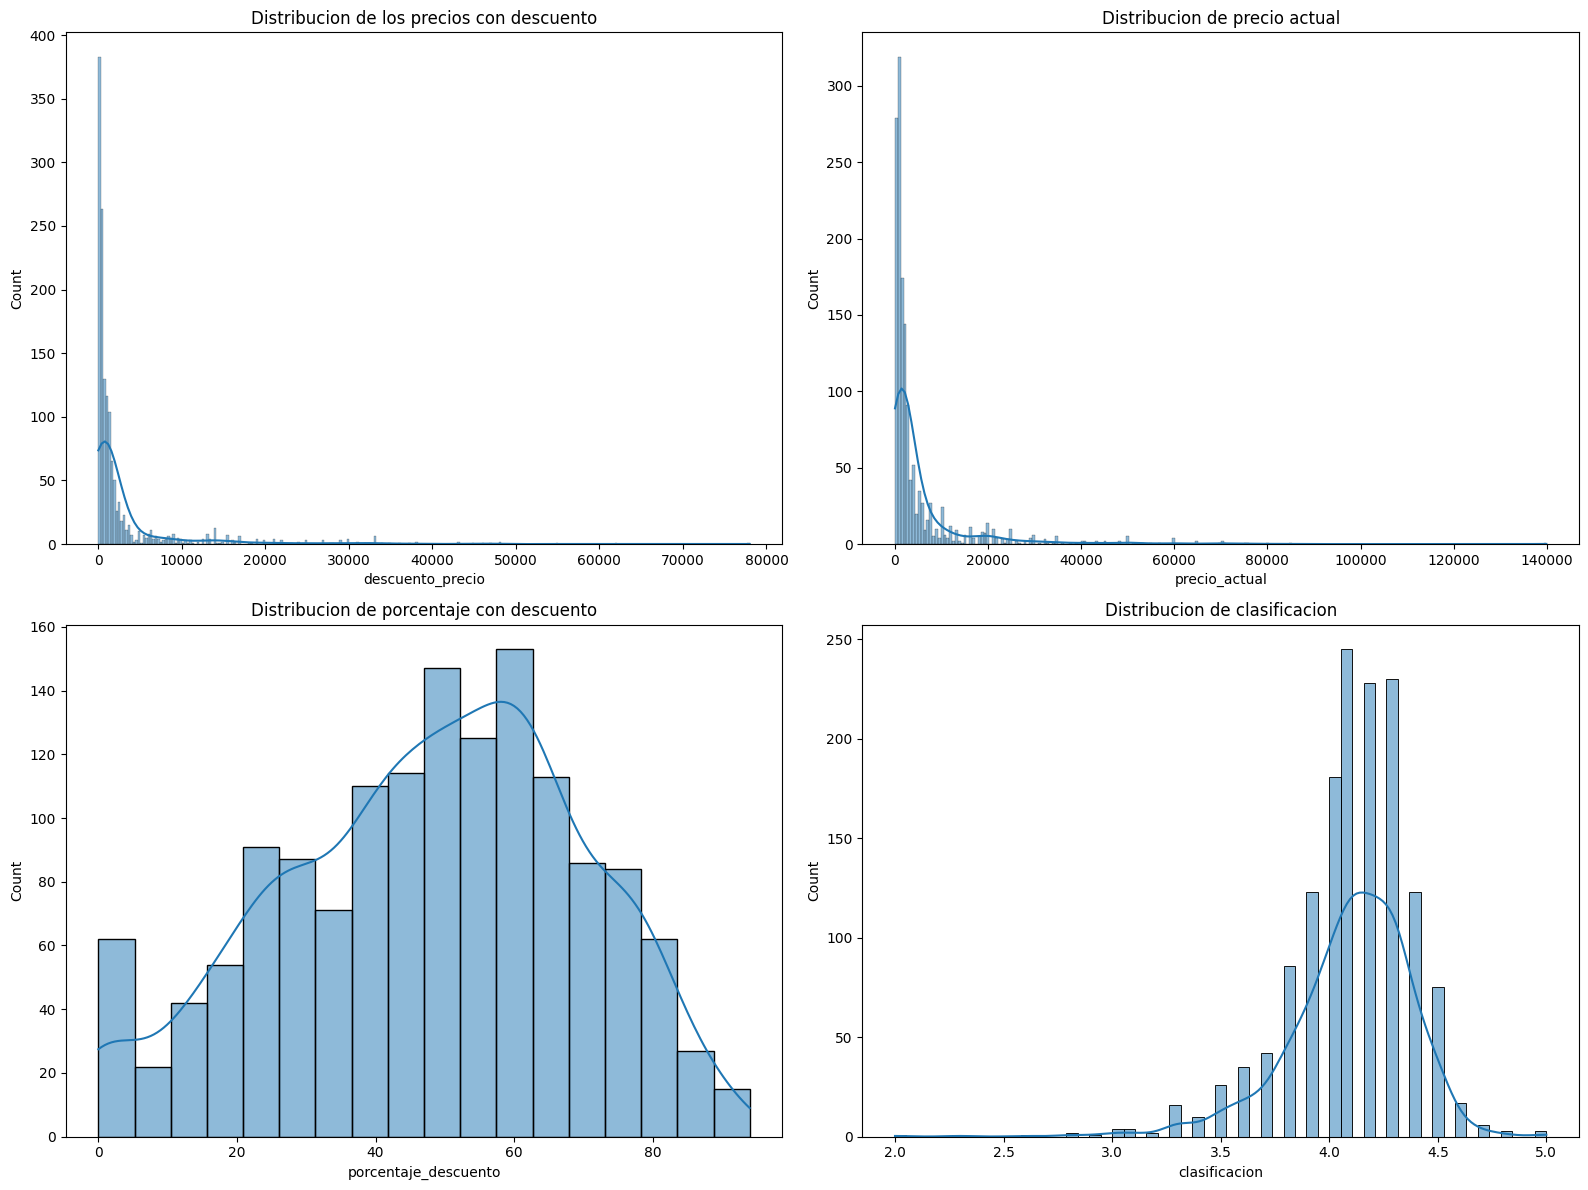

In [163]:
fig, axes = plt.subplots(2, 2, figsize= (16,12))
sns.histplot(df['descuento_precio'], kde= True, ax=axes[0,0])
axes[0,0].set_title('Distribucion de los precios con descuento')

sns.histplot(df['precio_actual'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribucion de precio actual')

sns.histplot(df['porcentaje_descuento'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribucion de porcentaje con descuento')

sns.histplot(df['clasificacion'], kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribucion de clasificacion')

plt.tight_layout()
plt.show()

## Recuento de productos por calificación

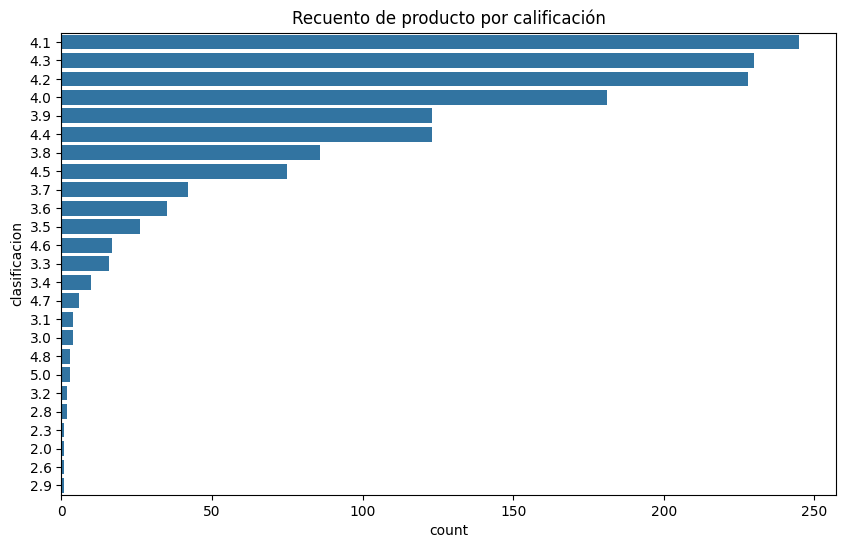

In [164]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['clasificacion'],order=df['clasificacion'].value_counts().index)
plt.title('Recuento de producto por calificación')
plt.show()

## Precio vs Calificacion

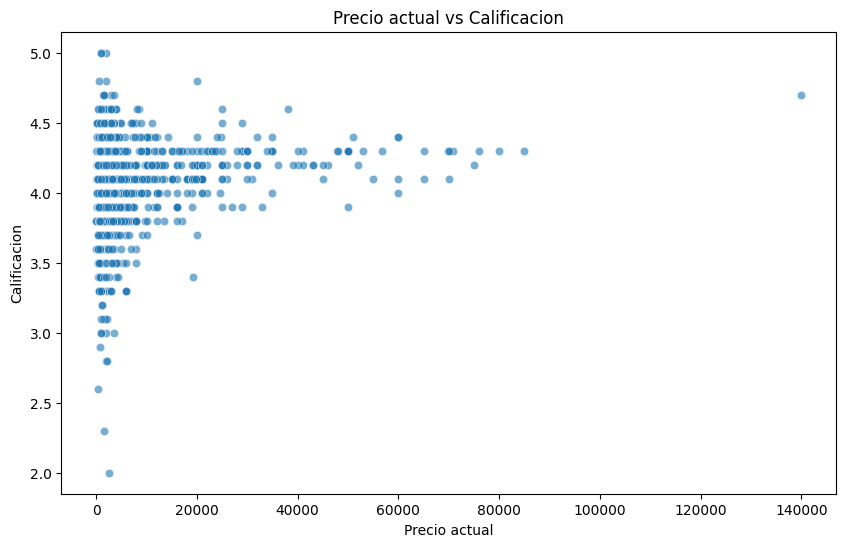

In [165]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='precio_actual', y= 'clasificacion', data=df, alpha=0.6)
plt.title('Precio actual vs Calificacion')
plt.xlabel('Precio actual')
plt.ylabel('Calificacion')
plt.show()

## Mapa de calor de correlación

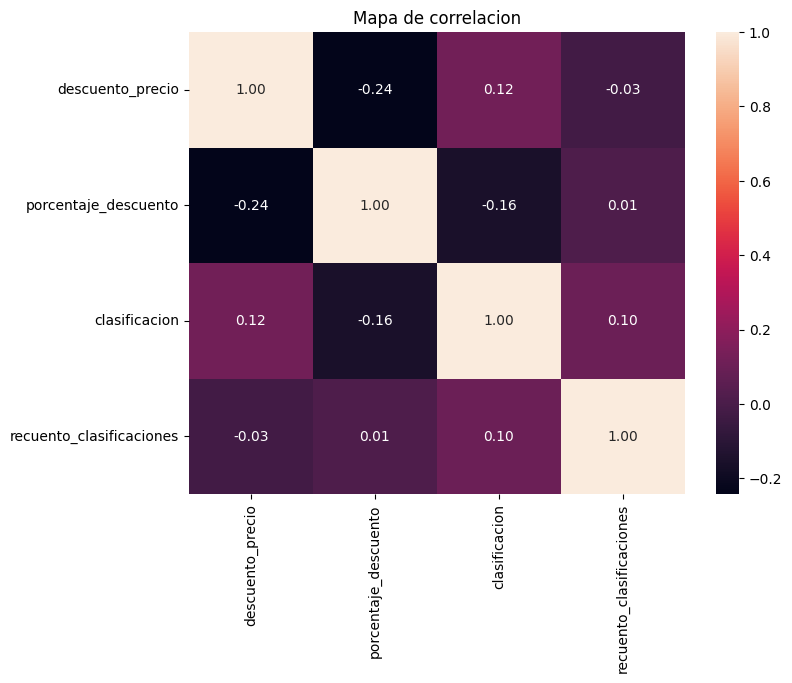

In [166]:
plt.figure(figsize=(8,6))
corr = df[['descuento_precio', 'porcentaje_descuento', 'clasificacion', 'recuento_clasificaciones']].corr()

sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Mapa de correlacion")
plt.show()

## Participación de productos por calificación (%)

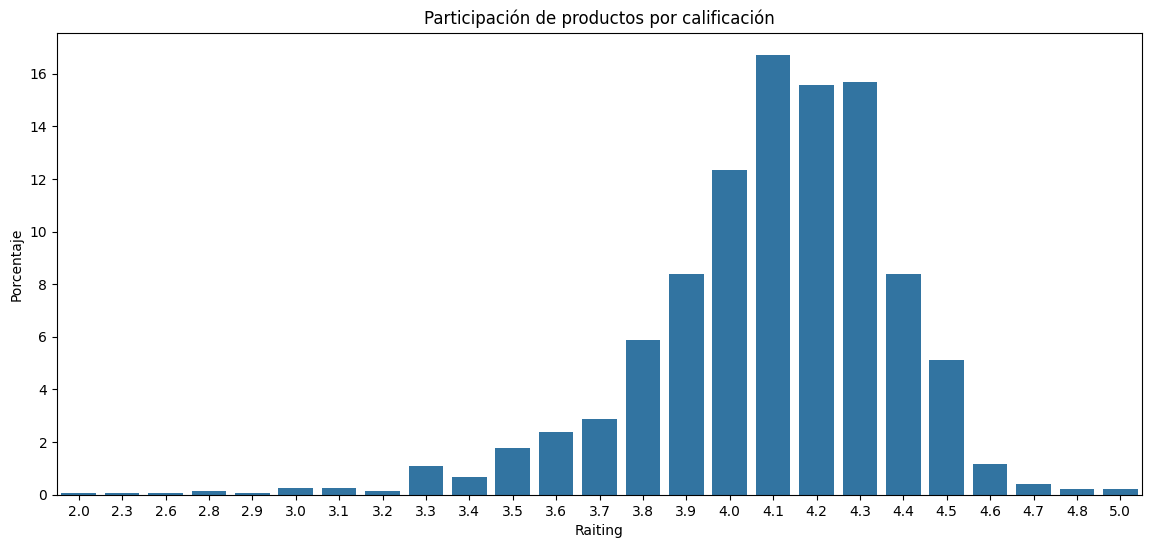

In [167]:
plt.figure(figsize=(14,6))
recuento_calificacion = df['clasificacion'].value_counts(normalize=True) * 100
sns.barplot(x= recuento_calificacion.index, y= recuento_calificacion.values)
plt.ylabel('Porcentaje')
plt.xlabel('Raiting')
plt.title('Participación de productos por calificación')
plt.show()

## Las 10 categorias principales de productos

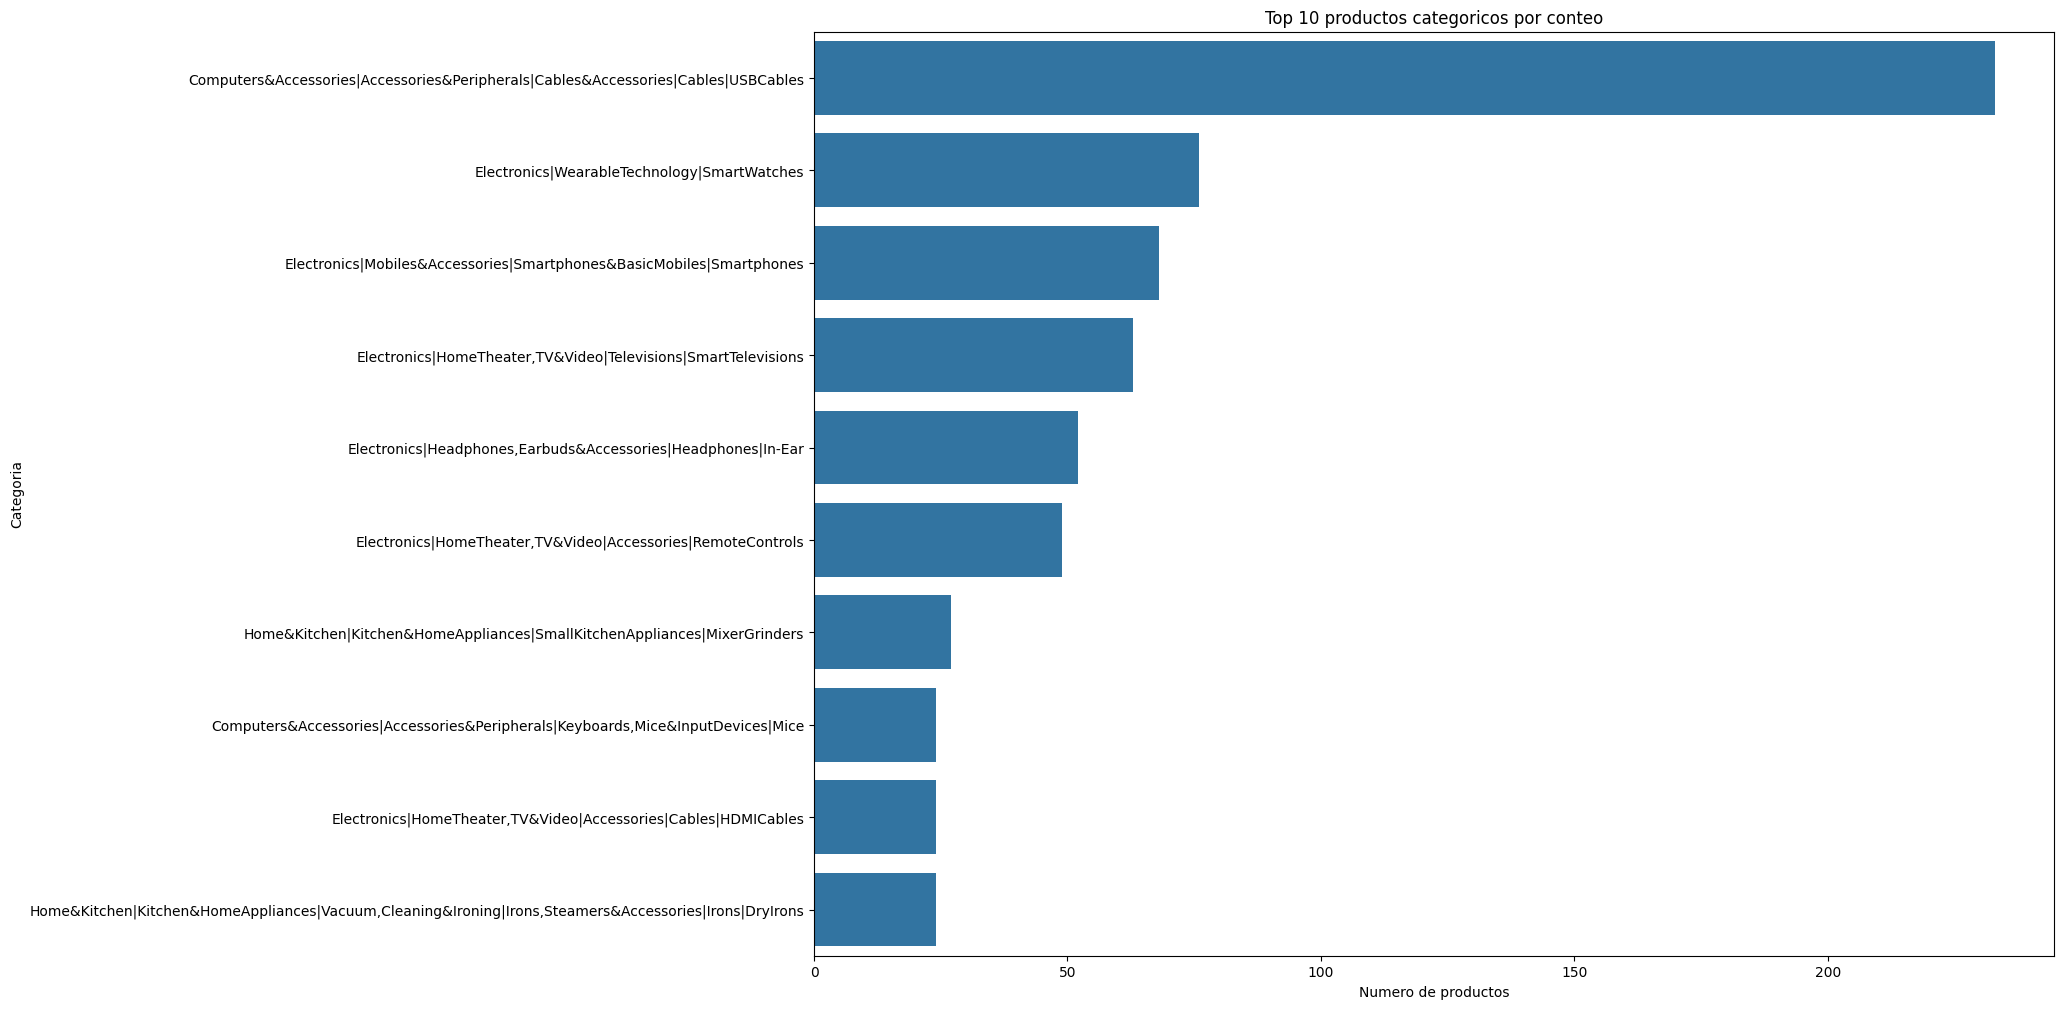

In [168]:
plt.figure(figsize=(16,12))
top_categorias = df['categoria'].value_counts().nlargest(10)
sns.barplot(x= top_categorias.values, y=top_categorias.index)
plt.title('Top 10 productos categoricos por conteo')
plt.xlabel('Numero de productos')
plt.ylabel('Categoria')
plt.show()

## Observacion de las visualizaciones

- Distribucion de precio(con descuento y real):
* Ambas variables de precio muestran una distribución sesgada a la derecha.
* La mayoria de los productos se encuentran en el rango de precios bajo a medio
* Los articulos de alta gama son poco comunes, lo que indica que solo algunos listados son premium


## Porcentaje de descuento:

* Los porcentajes de descuento varián, pero la mayoria ocilan entre el 40% y el 70%.
* Esto sugiere que Amazon suele ofrecer grandes descuentos para atraer compradores

## Raiting de calificaciones:

* La mayoria de las calificaciones tienen entre 3,5 y 4,5 estrellas, con un pico visible cerca de 4,0.
* Esto refleja una alta satisfacción del cliente y una buena calidad del producto.
* Solo unos pocos productos tienen calificaciones inferiores a 3.

## Porcentaje de descuento por valoración.

* Casi el 95% de los productos tienen valoraciones de 4 estrellas o más.
* Esto indica que el conjunto de datos está dominado por reseñas positivas

## Recuento por productos por calificacion exacta:

* Las calificaciones más frecuentes son 4.0, 4.1, 4.2 y 4.3.
* Pocos productos tienen calificaciones neutrales o bajas, lo que demuestra una sólida reputación del vendedor y la confianza del cliente.

# Codificacion

## Codificacion de variables categoricas:

Antes de entrar en el modelo, necesito convertir las caracteristicas categóricas a formato numérico, ya que la mayoria de los algoritmos de aprensizaje automatico solo funcionan con datos numéricos.

Utilizare la codificación de etiquetas para transformar cada columna categórica en códigos numéricos

In [169]:
# Codificacion de variables categoricas
col_categoricas = df.select_dtypes(include=['object']).columns

codificador_etiqueta = {}

for col in col_categoricas:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    codificador_etiqueta[col] = le

In [170]:
codificador_etiqueta

{'id_producto': LabelEncoder(),
 'nombre_producto': LabelEncoder(),
 'categoria': LabelEncoder(),
 'detalle_producto': LabelEncoder(),
 'id_usuario': LabelEncoder(),
 'nombre_usuario': LabelEncoder(),
 'id_de_revision': LabelEncoder(),
 'titulo_resenia': LabelEncoder(),
 'contenido_revision': LabelEncoder(),
 'link_imagen': LabelEncoder(),
 'link_producto': LabelEncoder()}

# Aplicando Mechine Learning

## Resumen del proyecto:

* Objetivo: Predecir el precio con descuento de los productos de Amazon mediante atributos de producto.
* Tipo: Regresión.
* Variable objetivo: "porcentaje_descuento"
* Caracteristicas de entrada: precio real, porcentaje de descuento, calificación, reciento de calificaciones, categoría, caracteristicas de ingeniería
* Métricas de evaluación: RMSE, MAE, puntuación R²

## División de entrenamiento y prueba

In [171]:
X = df.drop(columns='porcentaje_descuento')
y = df['porcentaje_descuento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Formato de entrenaimento:', X_train.shape)
print('Formato de prueba:', X_test.shape)

Formato de entrenaimento: (1172, 15)
Formato de prueba: (293, 15)


In [172]:
X.isnull().sum()

id_producto                 0
nombre_producto             0
categoria                   0
descuento_precio            0
precio_actual               0
clasificacion               0
recuento_clasificaciones    0
detalle_producto            0
id_usuario                  0
nombre_usuario              0
id_de_revision              0
titulo_resenia              0
contenido_revision          0
link_imagen                 0
link_producto               0
dtype: int64

## Aplicando modelos de linea base y modelos avanzados para evaluar y comparar su desempeño en la predicción de la variable objetico

### Para medir el rendimiento del modelo de regresión, definimos una función auxiliar evaliacion_modelo() que calcula métricas de evaluacion clave:

* RMSE (Error Cuadrático Medio): Mide la magnitud promedio de los errores de predicción. Un RMSE bajo indica un mejor rendimiento del modelo.

* MMAE (Error Absoluto Medio): Representa el promedio de las diferencias absolutas entre los valores predichos y los reales.

* R² (Coeficiente de determinación): Muestra la presición con la que el modelo explica la variabilidad de la variable objetico. Un valor cercano a 1 indica un mejor ajuste.

In [173]:
def evaluacion_modelo(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)     # Entrenando el modelo, X de entrenamiento, y de entrenamiento
    y_pred = model.predict(X_test)  # Almaceno las predicciones de X testeo en la variable y_pred
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))    # Comparo los errores con el y_test y y_pred
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

## Entrenamiento y evaluación de los siguientes modelos de regresión:

* Regresión linel.
    
* Regresor de árbol de desición.

* Regresor de bosque aleatorio.

* Regresor de potenciación de gradiante.

* Regresor XGBBoost.

Cada modelo se evaluará con base en el RMSE, el MAE y la puntuación de R², y su rendimiento se visualizara mediante un gráfico de barras

In [174]:
# Definiendo los modelos:

modelos = {
    "Regresion Lineal": LinearRegression(),
    "Regresor de árbol de decosión": DecisionTreeRegressor(random_state=42),
    'Regresor de bosque aleatorio': RandomForestRegressor(random_state=42),
    'Regresor de refuerzo de gradiente': GradientBoostingRegressor(random_state=42),
    'Regresor XGBoost': XGBRegressor(random_state = 42, learning_rate=0.1)
}

# Evaluar cada modelo
resultado = {}
for nombre, modelo in modelos.items():
    scores = evaluacion_modelo(modelo, X_train, y_train, X_test, y_test)
    resultado[nombre] = scores

# Convertir resultados a DataFrame
resultados_df = pd.DataFrame(resultado).T
resultados_df = resultados_df.sort_values(by="RMSE", ascending=True)
display(resultados_df)

,RMSE,MAE,R2
Regresor XGBoost,5.553894,3.409213,0.921061
Regresor de refuerzo de gradiente,6.521139,4.822295,0.891172
Regresor de bosque aleatorio,6.676313,4.361843,0.885931
Regresor de árbol de decosión,14.853092,9.249147,0.435416
Regresion Lineal,15.570604,12.326040,0.379551


## Comparar gráficos y encontrar el mejor modelo

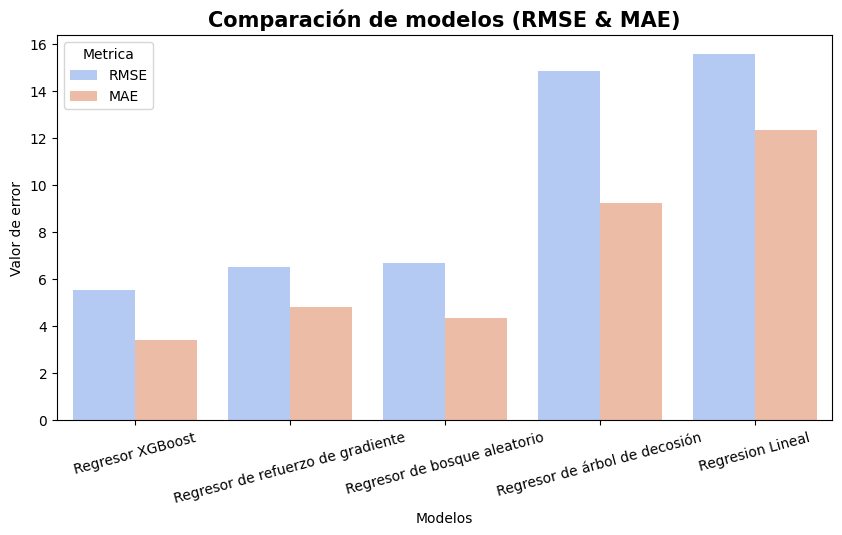

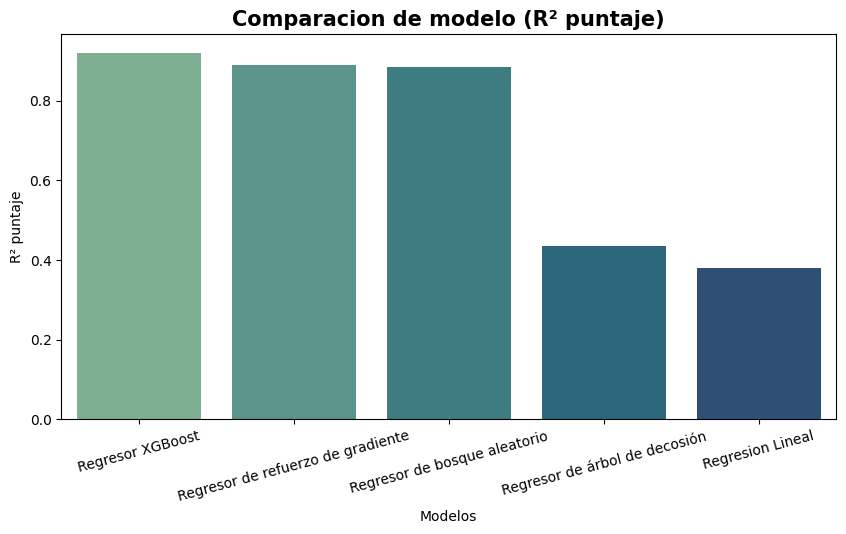

In [175]:
# Grafica RMSE y MAE
plt.figure(figsize=(10,5))
sns.barplot(data=resultados_df[['RMSE','MAE']].reset_index().melt(id_vars='index'), x='index', y='value', hue='variable',palette='coolwarm')
plt.title('Comparación de modelos (RMSE & MAE)', fontsize=15, fontweight='bold')
plt.xlabel('Modelos')
plt.ylabel('Valor de error')
plt.xticks(rotation=15)
plt.legend(title='Metrica')
plt.show()

# GRafica R2 por separado
plt.figure(figsize=(10,5))
sns.barplot(data=resultados_df[['R2']].reset_index(), x= 'index', y='R2', palette='crest')
plt.title('Comparacion de modelo (R² puntaje)', fontsize=15, fontweight='bold')
plt.xlabel('Modelos')
plt.ylabel('R² puntaje')
plt.xticks(rotation=15)
plt.show()

## Ahora:

* Seleccionar el mejor modelo (En base al RMSE más bajo).

* Entrenarlo completamente con los datos de entrenamiento.

* Graficar los valores predichos y reales.

* Mostar las métricas de presición finales.

In [ ]:
# Identificar el mejor modelo en función del RMSE más bajo
nombre_mejor_modelo = resultados_df['RMSE'].idxmin()        # Usar .idxmin para obtener el nombre del modelo
print(f'Mejor modelo: {nombre_mejor_modelo}')               # Identificar el mejor modelo en función del RMSE más bajo

# Recuperar el mejor objeto modelo
mejor_modelo = modelos[nombre_mejor_modelo]                 # Recuperar el modelo en función del RMSE más bajo
mejor_modelo.fit(X_train, y_train)                          # Entrenar el modelo con todos los datos de entrenamiento
y_pred = mejor_modelo.predict(X_test)                       # Hacer predicciones en el conjunto de prueba

# Evaluacion
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\n''Rendimiento del modelo en datos de prueba')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R²: {r2:.4f}')

Mejor modelo: Regresor XGBoost

Rendimiento del modelo en datos de prueba
RMSE: 5.5539
MAE: 3.4092
R²: 0.9211


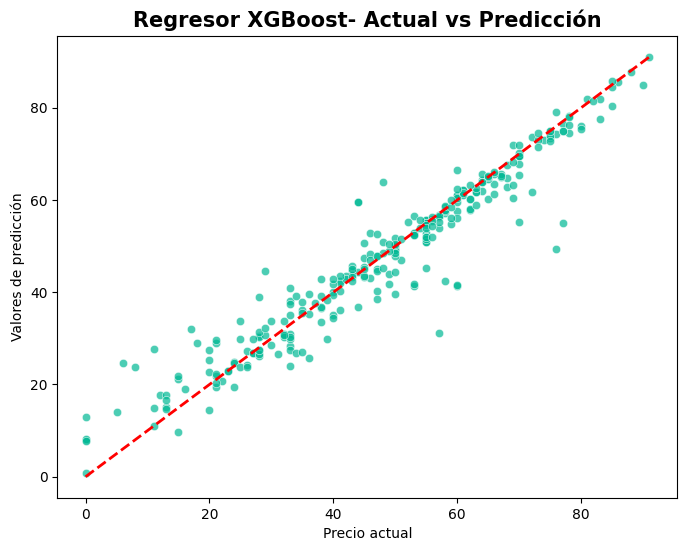

In [ ]:
# Grafico: real vs prediccion
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="#00b894")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'{nombre_mejor_modelo}- Actual vs Predicción', fontsize=15, fontweight='bold')
plt.xlabel('Precio actual')
plt.ylabel('Valores de predicción')
plt.show()

# Graficó residual:
residual = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residual, bins=30, kde=True, color='#0984e3')
plt.title(f'{nombre_mejor_modelo}- Distrubución residual', fontsize=15, fontweight='bold')
plt.xlabel('Error de predicción (residuos)')
plt.ylabel('Frecuencia')
plt.show()